### SRE - May 15, 2024
#### Support Vector Machines

In [1]:
#import packages
#standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

##support vector machine package
from sklearn import svm 
#evaulation metrics
from sklearn import metrics

import nltk

#testing and training set splitting function
from sklearn.model_selection import train_test_split

print("packages imported")

packages imported


##### What is a Support Vector Machine?

- Classification algorithm for two-group classification problems
- The Support Vector Machine will classify the data by finding the line that maximizes the distance between the two groups


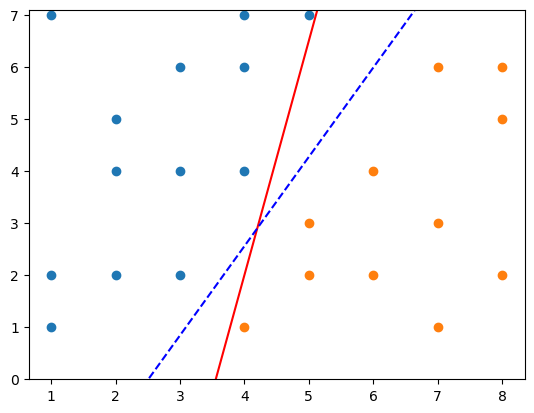

In [2]:
##generate some example data
data_1_x = [1,1,1,2,2,2,3,3,3,4,4,4,5]
data_1_y = [1,2,7,2,4,5,2,4,6,4,6,7,7]
data_2_x = [4,5,5,6,6,7,7,7,8,8,8]
data_2_y = [1,2,3,2,4,1,3,6,2,5,6]

#sample dividing lines
x = np.linspace(1,8,20)
y = 4.5*x-16
y_2 = (6/3.5)*x-4.3

#plot
plt.scatter(data_1_x, data_1_y)
plt.scatter(data_2_x, data_2_y)
plt.plot(x,y,'-r')
plt.plot(x,y_2,'--b')
plt.ylim([0,7.1])
plt.show()

**Main Idea:** we want to be able to "draw" a straight line to divide our data into two groups.

- But how do we determine the *optimal* straight line to be able to divide the data?
- Support Vector Machines are derived so that the "width" of the gap between the two groups is as large as possible.
- In the plot below we can see the *spread* of the data with the red lines.
- The blue line indicates the middle (or median) of the spread.  The blue line is the *decision boundary*, where points on the left are "classified" as blue points and points on the right are "classified" as orange points.

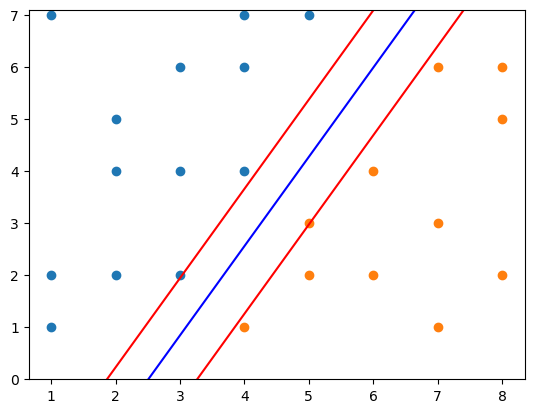

In [3]:
##generate some example data
data_1_x = [1,1,1,2,2,2,3,3,3,4,4,4,5]
data_1_y = [1,2,7,2,4,5,2,4,6,4,6,7,7]
data_2_x = [4,5,5,6,6,7,7,7,8,8,8]
data_2_y = [1,2,3,2,4,1,3,6,2,5,6]

#boundary lines and middle line for SVM
x = np.linspace(1,8,20)
y = (6/3.5)*x-3.2
y_1 = (6/3.5)*x-4.3
y_2 = (6/3.5)*x-5.6

#plot
plt.scatter(data_1_x, data_1_y)
plt.scatter(data_2_x, data_2_y)
plt.plot(x,y,'-r')
plt.plot(x,y_1,'-b')
plt.plot(x,y_2,'-r')
plt.ylim([0,7.1])
plt.show()

#### How do we make decisions with a Support Vector Machine?

The derivation follows closely the derivation presented by Dr. Patrick Winston as part of [MIT's Open CourseWare](https://www.youtube.com/watch?v=_PwhiWxHK8o).  There is a worked example [here](https://www.youtube.com/watch?v=6nDqY8MPLDM) using some of the main equations, which might also be helpful.

- Construct a vector $\vec{w}$ that is perpendicular to the blue line.
- Suppose we have a point $P = (a,b)$.

How do we decide if this is a blue point or an orange point?

Well, we can construct a vector from the origin out to $P,$ and then project the vector $\vec{OP}$ onto the direction $\vec{w}:$

$$\vec{w} \cdot \vec{OP} \geq c,$$

where $c$ defines the distance along $\vec{w}$ to the blue line.  If the value is bigger than $c$, then $P$ should be classified as an orange point.  If it is less, then it should be classified as a blue point.

Note: you may see this written as $\vec{w} \cdot \vec{OP} - c\geq 0$ or $\vec{w} \cdot \vec{OP} + b \geq 0.$

**Problems:**
1. We don't know what constant $c$ to use.
2. We don't know what vector $\vec{w}$ to use. In particular, $\vec{w}$ can be any length.

Need some additional pieces to be able to calculate the $\vec{w}$ and $c$ value.

Some helpful definitions.

Let $s$ be the orange points.
Let $t$ be the blue points.

Then the vectors $\vec{s}$ and $\vec{t}$  define the distance from the origin to the points. 

Now, since these are known orange and blue points, we can project them onto the direction of the vector $\vec{w}$.

\begin{align}
\vec{w} \cdot \vec{s} + b &\geq 1 \\
\vec{w} \cdot \vec{t} + b &\leq -1
\end{align}
Why $1$ and $-1$ here? Well, we want to be sure of our decision, so we are going to require the distance from the blue line be decently large.  This means that we have a separation in our points of $[-1,1].$

To make this more convenient to write, define $y_i$ such that 

$$y_i = \begin{cases} 
1, {\textrm{for $s$ points}}\\
-1, {\textrm{for $t$ points}}\\
\end{cases}$$

Then, multiplying the equations above by $y_i$ gives:
\begin{align}
y_i(\vec{w} \cdot \vec{s}_i + b) &\geq 1 \\
y_i(\vec{w} \cdot \vec{t}_i + b) &\geq 1
\end{align}
where the second equation results in a +1 because $y_i$ is $-1$ for points $t_i.$

Since the constraint is always $\geq 1$, if we let $x_i$ be any point, then we can write:

$$y_i(\vec{w}\cdot \vec{x}_i + b) -1 \geq 0.$$

Note that
$$y_i(\vec{w}\cdot \vec{x}_i + b) -1 = 0,$$
for $x_i$ on the red lines.

##### Width between red lines
We want the width between the two red lines to be as large as possible. 

Well, we have $\vec{s}$ and $\vec{t}$, and suppose $\vec{s}_r$ and $\vec{t}_r$ are points on the red line.  We can find the difference between them: $\vec{s}_r - \vec{t}_r,$ but this distance may not be the "width" as the resulting vector may not be perpendicular to the red lines.

If we have a unit normal to the red line, we could project the distance $\vec{s}_r - \vec{t}_r$ onto the unit normal, and then this would be the width.  Since $\vec{w}$ is normal to the red lines, let's use this!

\begin{align*}
\implies \textrm{width} &= (\vec{s}_r - \vec{t}_r) \cdot \left( \dfrac{\vec{w}}{\| \vec{w} \| } \right)\\
& = \vec{s}_r \cdot \left( \dfrac{\vec{w}}{\| \vec{w} \| } \right) - \vec{t}_r\cdot \left( \dfrac{\vec{w}}{\| \vec{w} \| } \right)
\end{align*}

For $\vec{s}_r$ on the red line boundary, $y_i$ is $1$, and so we can use the condition above to write $\vec{s}_r \cdot \vec{w} = 1-b.$ Similarly for $\vec{t}_r$, where $y_i$ is $-1$, we can write $\vec{t}_r \cdot \vec{w} = -1-b.$

\begin{align*}
\implies \textrm{width} &= \vec{s}_r \cdot \left( \dfrac{\vec{w}}{\| \vec{w} \| } \right) - \vec{t}_r\cdot \left( \dfrac{\vec{w}}{\| \vec{w} \| } \right)\\
& = \dfrac{1}{\|\vec{w} \|} \left( (1-b) - (-1-b)\right) \\
& = \dfrac{2}{\|\vec{w} \|}
\end{align*}

This means to get the widest distance between the red lines, we need to maximize $\dfrac{2}{\|\vec{w} \|}!$

But that's the same as maximizing $\dfrac{1}{\|\vec{w} \|}.$  

But maximizing this is the same as minimizing $\| \vec{w} \|!$

But this means it is also the same as minimizing $ \dfrac{1}{2} \| \vec{w} \|^2.$  This is much more mathematically convenient to minimize over. 

##### Constrained optimization

So, we want to minimize  $ \dfrac{1}{2} \| \vec{w} \|^2$ subject to $y_i(\vec{w}\cdot \vec{x}_i + b) -1 = 0$.  This is a Lagrange Multipliers problem!

So:

$$L = \dfrac{1}{2} \| \vec{w} \|^2 - \sum\limits_{i} \lambda_i \left( y_i(\vec{w}\cdot \vec{x}_i + b) -1 \right),$$

where the $\lambda_i=0$ if the $x_i$ is not on the red lines.

Now, we do the Lagrange multipliers formulation -- take the derivatives and set them equal to zero.

$$\dfrac{\partial L}{\partial \vec{w}} = \vec{w} - \sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right)$$

Note that to differentiate with respect to a vector we multiply everything out and put into the respective components.  We then differentiate everything with respect to what we are differentiating with respect to, and it turns out to be the same as above.  

**Note:** Yes, this is a gradient... I misspoke this morning -- apologies!  For the term $\dfrac{1}{2} \| \vec{w} \|^2,$ there is a nice derivation on stackexchange for this [here.](https://math.stackexchange.com/questions/883016/gradient-of-2-norm-squared)

Setting the derivative to zero and solving for $\vec{w}$ give:
$$\implies \vec{w} = \sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right).$$

So the vector $\vec{w}$ is a linear sum of information coming from the input data!

\begin{align*}
\dfrac{\partial L}{\partial b} &= - \sum\limits_{i} \left(\lambda_i y_i \right) \\
\implies \sum\limits_{i} \left(\lambda_i y_i \right) &= 0
\end{align*}

Next step is to plug in the expression for $\vec{w}$ into the Lagrange equation.

\begin{align*}
L &= \dfrac{1}{2} \| \vec{w} \|^2 - \sum\limits_{i} \lambda_i \left( y_i(\vec{w}\cdot \vec{x}_i + b) -1 \right)\\
& = \dfrac{1}{2} \left( \sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right) \right) \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right) \right) - \sum\limits_{i} \lambda_i y_i \vec{x}_i  \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right)\right) - \sum\limits_{i} \lambda_i y_i b + \sum\limits_i \lambda_i \\
& = \dfrac{1}{2} \left( \sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right) \right) \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right) \right) - \sum\limits_{i} \lambda_i y_i \vec{x}_i  \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right)\right) - b \sum\limits_{i} \lambda_i y_i  + \sum\limits_i \lambda_i \\
& = \dfrac{1}{2} \left( \sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right) \right) \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right) \right) - \sum\limits_{i} \lambda_i y_i \vec{x}_i  \cdot \left( \sum \limits_{j} \left(\lambda_j y_j \vec{x}_j \right)\right) + \sum\limits_i \lambda_i\\
& = \sum\limits_i \lambda_i - \dfrac{1}{2} \sum\limits_i \sum\limits_j \lambda_i \lambda_j y_i y_j \vec{x}_i \cdot \vec{x}_j
\end{align*}

This is the equation we want to find optimal values for. 

Notes: 
1. The optimization only depends on the dot product of pairs of samples from the data.
2. Going back to the decision rule we have that $$\sum \limits_{i} \left(\lambda_i y_i \vec{x}_i \right) \cdot \vec{OP} + b \geq 0$$ means we have an orange point.  This rule also only depends on the dot product of the points in the data set and the new point to consider.
3. All of the dependence of the decision is on a dot product! 

### What happens if we have points that fall in between the red lines? 

Or points that are not "seperable" in the current space we are operating in?

We need a **transformation** to move to a more convenient space. Let's call this transformation $\phi$.

Since the entire protocol is tied to a dot product, we just need to optimize $\phi(\vec{x}_i) \cdot \phi(\vec{x}_j).$  To be able to determine where new points should fall, we need to determine $\phi(\vec{x}_i) \cdot \phi(\vec{OP}).$

Suppose we have a function, $K$, such that $$K(\vec{x}_i,\vec{x}_j) = \phi(\vec{x}_i) \cdot \phi(\vec{x}_j).$$  Here, we do not need to know what $\phi$ is, but rather we need to know what $K$ is to define the dot product $ \phi(\vec{x}_i) \cdot \phi(\vec{x}_j).$  The function $K$ here is called a **Kernel Function.**

##### Popular Kernel Functions
1. Linear Kernel: $$(\vec{x}_i\vec{x}_j +1) ^n$$
2. Radial Basis Kernel: $$e^{- \dfrac{\| \vec{x}_i - \vec{x}_j \|}{\sigma}}$$
Typically $n$ and $\sigma$ are tuning parameters.

Notes: 
1. This method does not protect against overfitting.
2. The set up here generally results in a convex problem, so there is a global optimal value.

### Implementation in Python!

Python has the function `SVM` as part of the `scikit.learn` package -- documentation [here.](https://scikit-learn.org/stable/modules/svm.html)

In [4]:
## generate some example data
## this is the same data as before, however, the set of points have been
## combined into X
## 0 indicates the point is a blue point and 1 indicates it is an orange
## point, so the SVM here is "asking" is the point orange in the decision
X = [[1,1],[1,2],[1,7],[2,2],[2,4],[2,5],[3,2],[3,4],[3,6],[4,4],[4,6],[4,7],[5,7],[4,1],[5,2],[5,3],[6,2],[6,4],[7,1],[7,3],[7,6],[8,2],[8,5],[8,6]]
Y = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

# split the data into a 70% for training
# and 30 % for testing... using a specified random_state so that 
# the random split is the "same" everytime we run the cell
# we typically want to specifiy the random_state when we are writing code
# and debugging, otherwise changes in the output may be due to the random
# split of testing/training data rather than an error in the code
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=109) # 70% training and 30% test

#Generate the SVM classifier
SVM_classifier = svm.SVC(kernel='linear') # Linear Kernel

#Now train the SVM on the training data from the data set using the .fit function
SVM_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [5]:
## Now how do we tell if the SVM is working well?
## We will use the testing set to see if the SVM 
## classifier is classifying points correctly.

#define a new variable y_predicted
#which will predict the output values for the X values in the testing set
y_predicted = SVM_classifier.predict(X_test)

print(y_predicted)
print(y_test)

[0 0 1 1 0 1 1 1]
[0, 0, 1, 1, 0, 1, 1, 1]


#### Machine Learning Metrics

Because data used in ML techniques often has a high dimension, we are often not able to make plots (visualizations) to "see" if the ML model is performing well.

One way to "see" if the model is performing well is to track the True Positives, True Negatives, False Positives, and False Negatives when using the testing portion from the training set. If our model is working well, we should see good agreement between the "human" classified values and the ML classified values in the testing portion of the training set. 

- True Positive (TP): Both Human and Machine classify as "yes": i.e., positive indication that the classification is present (usually denoted by a 1 in the `y` vector)
- True Negative (TN): Both Human and Machine classify as "no": i.e., indication that the classification is not present (usually denoted by a 0 in the `y` vector)
- False Positive (FP): Human classification is "no" but Machine classification is "yes"
- False Negative (FN): Human classification is "yes" but Machine classification is "no"

We can look at these individually, usually in the form of a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).

A confusion matrix is a visualization of how well the classification is performed.  Across the row, we have the predicted true and false, and down a column we have the actual true and false.  If the classification is good, we will see all see a diagonal $2 \times 2$ matrix indicating that the machine learning model correctly classifies all true points as true and all false points as false. 

The off-diagonal elements show false positives (i.e., when the machine learning classification classifies a point as true, but the point is actually false) and false negatives (i.e., when the machine learning classigication classifies a point as false, but it is actually true). We generally do not want to see too many entries in the off-diagonal elements, however, it is up to the modeller to decide what an "acceptable" level of accuracy is for the context of the problem they are trying to model. 

In [6]:
## the entries of the confusion matrix are:
## C[0,0] true negatives 
## C[1,0] false negatives  
## C[1,1] true positives
## C[0,1] false positives

## note that this is slightly different than the 
## confusion matrix on the wikipedia page!

C = metrics.confusion_matrix(y_test,y_predicted)

C

array([[3, 0],
       [0, 5]])

Often, there are specific fractions that are helpful to use as metrics for determining if the Machine Learning algorithm is doing an OK job. 

- Accuracy: Fraction of the time the classifier is correct.
- Precision: $\frac{TP}{TP+FP}$
- Recall: $\frac{TP}{TP+FN}$

In [7]:
## this seems to do OK, but would be difficult to manually check for large training sets.

## Generally, for Machine Learning techniques, we want to output:
## Accuracy -- what fraction of the time is the classifier correct
print("Model Accuracy:",metrics.accuracy_score(y_test, y_predicted))

## Precision -- fraction of true positives divided by the true positives and false positives 
print("Precision:",metrics.precision_score(y_test, y_predicted))

## Recall -- fraction of true positives divided by the true positives and false negatives 
print("Recall:",metrics.recall_score(y_test, y_predicted))

Model Accuracy: 1.0
Precision: 1.0
Recall: 1.0


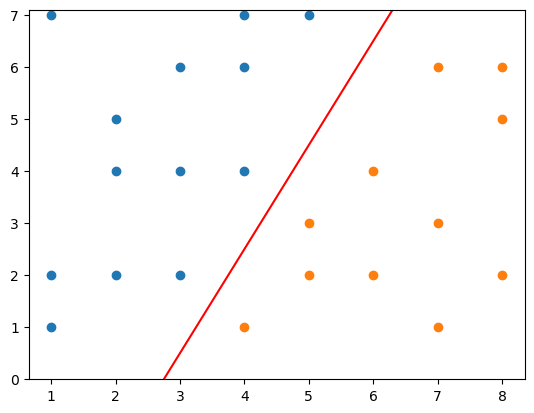

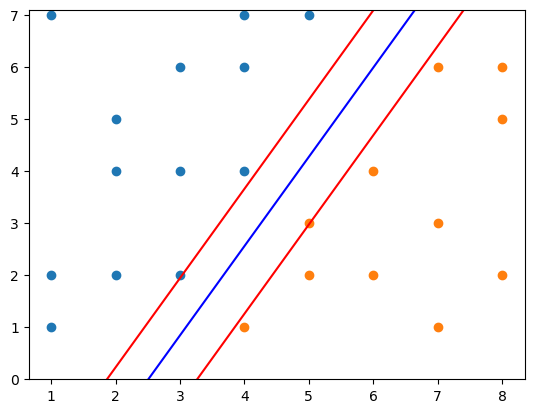

In [8]:
## In some instances we can plot the resulting SVM
## In the case of this data, since we are in 2D
## we can plot the resulting hyperplane
## In many cases, we will not be able to plot 
## the data and the hyperplane due to the dimensionality

# get out the necessary coefficients 
w = SVM_classifier.coef_[0] ## weights
m = -w[0] / w[1] ## slope of the line 

#make the SVM line
x_svm = np.linspace(1,8,20)
y_svm = m * x_svm - (SVM_classifier.intercept_[0]) / w[1]

#plot of data with SVM line
plt.scatter(data_1_x, data_1_y)
plt.scatter(data_2_x, data_2_y)
plt.plot(x_svm,y_svm,'-r')
plt.ylim([0,7.1])
plt.show()

## regenerate plot from above for comparison, where the blue 
## line was "eyeballed" as the optimal dividing boundary
plt.scatter(data_1_x, data_1_y)
plt.scatter(data_2_x, data_2_y)
plt.plot(x,y,'-r')
plt.plot(x,y_1,'-b')
plt.plot(x,y_2,'-r')
plt.ylim([0,7.1])
plt.show()

### How does this work with NLP?

We can use Support Vector Machines to "decide" where a given text is *in* the classification (usually denoted with a 1) or *not in* the classification (usually denoted with a 0). 

The following below is using twitter data that is classified into different emotions.  Each tweet can be classified into multiple emotions (and hence a multi-labelling).

The first few cell blocks here will be to clean the data, following the procedure on the kaggle site [here.](https://www.kaggle.com/code/sohaelshafey/multi-label-classification-tweets-preprocessing)

In [9]:
newdata_set = pd.read_csv('data3-test.txt',encoding='utf-8',sep="\t")
training_set = pd.read_csv('data3-train.txt',encoding='utf-8',sep="\t")

### following the data cleaning protocol on the kaggle website

#import regular expression library
import re

#extract hashtags from training data and put them in new column named hashtag 
training_set["hashtags"]=training_set["Tweet"].apply(lambda x:re.findall(r"#(\w+)",x))

#extract hashtags from new data and put them in new column named hashtag 
newdata_set["hashtags"]=newdata_set["Tweet"].apply(lambda x:re.findall(r"#(\w+)",x))

This data includes emojis in the tweets, which do not aid in classification in text processing, so we would like to remove these characters.  There is a package called `emoji` that does this.  We specifically need version 1.7, as there are some back compatibility issues with more recent versions. 

In [10]:
!pip install emoji==1.7

In [11]:
#preprocessing tweets training and testing
import emoji

#translate emojis in training
training_set["clean"]=training_set["Tweet"].apply(lambda x: emoji.demojize(x))

#translate emojis in new data
newdata_set["clean"]=newdata_set["Tweet"].apply(lambda x: emoji.demojize(x))

In [12]:
#remove urls in training
training_set["clean"]=training_set["clean"].apply(lambda x: re.sub(r"http:\S+",'',x))

#remove urls in new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: re.sub(r"http:\S+",'',x))

In [13]:
#tokenize training tweet
training_set["clean"]=training_set["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

#tokenize new data tweet
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

In [14]:
from nltk.corpus import stopwords
import string #load punctuation charachers

#remove stopwords and punctuations
stopwrds = set(stopwords.words('english'))

#training data
training_set["clean"]=training_set["clean"].apply(lambda x: [y for y in x if (y not in stopwrds)]) ##stop words
training_set["clean"]=training_set["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']','',y) for y in x]) ## punctuation
training_set["clean"]=training_set["clean"].apply(lambda x: [re.sub('\\n','',y) for y in x]) ##whitespace

#new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [y for y in x if (y not in stopwrds)])
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']','',y) for y in x])
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [re.sub('\\n','',y) for y in x])

In [15]:
#clean unneeded spaces or empty columns or non sense words

#training data
training_set["clean"]=training_set["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip())>2])

#new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip())>2])

In [16]:
#save Cleaned tweets

#training data
training_set=training_set[["clean","hashtags","anger","anticipation","disgust","fear","joy","love","optimism","pessimism","sadness","surprise","trust"]]
#new data
newdata_set=newdata_set[["clean","hashtags","anger","anticipation","disgust","fear","joy","love","optimism","pessimism","sadness","surprise","trust"]]

In [17]:
#counting each emotion 
val_df=pd.DataFrame([{"anger":len(training_set[training_set["anger"]==1]),
       "anticipation":len(training_set[training_set["anticipation"]==1]),
       "disgust":len(training_set[training_set["disgust"]==1]),
       "fear":len(training_set[training_set["fear"]==1]),
       "joy":len(training_set[training_set["joy"]==1]),
       "love":len(training_set[training_set["love"]==1]),
       "optimism":len(training_set[training_set["optimism"]==1]),
       "pessimism":len(training_set[training_set["pessimism"]==1]),
       "sadness":len(training_set[training_set["sadness"]==1]),
       "surprise":len(training_set[training_set["surprise"]==1]),
       "trust":len(training_set[training_set["trust"]==1])}])
val_df

,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2544,978,2602,1242,2477,700,1984,795,2008,361,357


In [18]:
#convert tokenize tweets to sentences
training_set["clean"]=training_set["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))

newdata_set["clean"]=newdata_set["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))

In [19]:
## check that the clean column is actually clean
## by printing out the top 5 rows
training_set.head(5)

,clean,hashtags,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,worry payment problem may never joyce meyer mo...,"[motivation, leadership, worry]",0,1,0,0,0,0,1,0,0,0,1
1,whatever decide make sure makes happy,[happy],0,0,0,0,1,1,1,0,0,0,0
2,maxkellerman also helps majority nfl coaching ...,[GOPATS],1,0,1,0,1,0,1,0,0,0,0
3,accept challenges literally even feel exhilara...,[],0,0,0,0,1,0,1,0,0,0,0
4,roommate okay spell autocorrect terrible first...,"[terrible, firstworldprobs]",1,0,1,0,0,0,0,0,0,0,0


In [20]:
# Now that the data is cleaned, we run the NLP techniques on it
from nltk.stem import WordNetLemmatizer #lemmatizer

## make a function that will lemmatize
## see https://gist.github.com/MaxHalford/68b584e9154098151e6d9b5aa7464948
## so that we can use lemmatization as the method to generate
## the words in the bag of words using CountVectorizer
def lemmatize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lemmatize,binary = True, ngram_range=(1,2))
text_vectors = vectorizer.fit_transform(training_set["clean"])


/opt/conda/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [21]:
## to run an SVM on this data, we will need a separate classifier
## for each emotion
## In total, we will need 11 SVMs!

#Generate the SVM classifier for anger
X_train_anger = text_vectors
Y_train_anger = training_set["anger"]
#split the training set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_train_anger,Y_train_anger, test_size=0.3,random_state=37) # 70% training and 30% test
#fit the SVM
SVM_classifier_anger = svm.SVC(kernel='linear') # Linear Kernel
SVM_classifier_anger.fit(X_train_a, y_train_a)

SVC(kernel='linear')

In [22]:
## now that it is fitted, let's see how "good" it is at
## predicting anger from tweets
y_predicted_a = SVM_classifier_anger.predict(X_test_a)

print(y_predicted_a[10])

1


In [23]:
## the entries of the confusion matrix are:
## C[0,0] true negatives 
## C[1,0] false negatives  
## C[1,1] true positives
## C[0,1] false positives

C = metrics.confusion_matrix(y_test_a,y_predicted_a)

C

array([[1157,  142],
       [ 249,  504]])

In [24]:
#evaluation metrics
print("Model Accuracy:",metrics.accuracy_score(y_test_a, y_predicted_a))

print("Precision:",metrics.precision_score(y_test_a, y_predicted_a))

print("Recall:",metrics.recall_score(y_test_a, y_predicted_a))

Model Accuracy: 0.8094541910331384
Precision: 0.7801857585139319
Recall: 0.6693227091633466


In [25]:
## seems to not do too bad... 
## let's now use the SVM to classify unknown tweets from the 
## testing set

text_vectors_1 = vectorizer.transform(newdata_set["clean"])
## why .transform here and .fit_transform above? 
## fit_transform() is used on the training data so that we can 
## scale the training data and also learn the mean/variance/other parameters 
## of that data. 
## transform() uses the same mean/variance/other calculated parameters
## from our training data to transform our test data
## see https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
y_test_a_predicted = SVM_classifier_anger.predict(text_vectors_1)

print(np.count_nonzero(y_test_a_predicted == 0))
print(np.count_nonzero(y_test_a_predicted == 1))

2494
765


Last week, Hidden Markov Models were mentioned as an extension piece that could be added to SVMs.  We may come back to this, but if you are interested, here are some good places to start. 

Hidden Markov Models: There is a great Medium article introduction [here](https://medium.com/@ompramod9921/hidden-markov-models-the-secret-sauce-in-natural-language-processing-98cde0372721) that would be a good place to start and explore from!

Python also has a package for this model -- see the documentation [here](https://tedboy.github.io/nlps/generated/generated/nltk.HiddenMarkovModelTrainer.html)